Importing Modules/Dependencies for Data Handling

In [1]:
import numpy as np
import pandas as pd

Reading Training and Testing Data Sets (Downloaded from https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)

In [2]:
credit_data = pd.read_csv('/content/drive/MyDrive/ML_Models/CreditFraud.csv/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML_Models/CreditFraud.csv/fraudTest.csv')

In [3]:
# first 5 rows of the dataset
credit_data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
# Getting info on the data n the data set
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Creating a function for Data Prerocessing

In [5]:
def preprocessing(data) :
  # deleting useless columns
  del_col = ['merchant','first','last','street','zip','unix_time','Unnamed: 0','trans_num','cc_num']
  data.drop(columns=del_col,inplace=True)

  # converting data-time features from object type to Numerical value
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
  data['trans_date'] = data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  data['trans_date'] = pd.to_datetime(data['trans_date'])
  data['dob'] = pd.to_datetime(data['dob'])

  data["age"] = (data["trans_date"] - data["dob"]).dt.days

  data['trans_month'] = data['trans_date'].dt.month
  data['trans_year'] = data['trans_date'].dt.year

  # using one-hot encoding for categorical data features
  data['gender'] = data['gender'].apply(lambda x : 1 if x=='M' else 0)
  data['gender'] = data['gender'].astype(int)
  data['lat_dis'] = abs(data['lat']-data['merch_lat'])
  data['long_dis'] = abs(data['long']-data['merch_long'])
  data = pd.get_dummies(data,columns=['category'])
  data = data.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])

  # returning the preprocessed dataset
  return data

In [6]:
# performing data preprocessing on credit_data (Training Data) and test_data
credit_data = preprocessing(credit_data.copy())
test_data = preprocessing(test_data.copy())

In [7]:
# Checking data after preprocessing
credit_data.head()

amt  gender  city_pop  is_fraud    age  trans_month  trans_year  \
0    4.97       0      3495         0  11255            1        2019   
1  107.23       0       149         0  14804            1        2019   
2  220.11       1      4154         0  20801            1        2019   
3   45.00       1      1939         0  18982            1        2019   
4   41.96       1        99         0  11967            1        2019   

    lat_dis  long_dis  category_entertainment  ...  category_grocery_pos  \
0  0.067507  0.870215                       0  ...                     0   
1  0.271247  0.024038                       0  ...                     1   
2  0.969904  0.107519                       1  ...                     0   
3  0.803731  0.447271                       0  ...                     0   
4  0.254299  0.830441                       0  ...                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  category_travel  
0                      0                      0                0  
1                      0                      0                0  
2                      0                      0                0  
3                      0                      0                0  
4                      0                      0                0  

[5 rows x 23 columns]

In [8]:
# Checking the data features, every feature is in numeric data type
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  int64  
 5   trans_month              1296675 non-null  int64  
 6   trans_year               1296675 non-null  int64  
 7   lat_dis                  1296675 non-null  float64
 8   long_dis                 1296675 non-null  float64
 9   category_entertainment   1296675 non-null  uint8  
 10  category_food_dining     1296675 non-null  uint8  
 11  category_gas_transport   1296675 non-null  uint8  
 12  category_grocery_net     1296675 non-null  uint8  
 13  category_grocery_pos     1296675 non-null 

In [9]:
# creating correlation matrix
correlation_matrix = credit_data.corr()

Importing Dependencies for Plotting the Correlation Matrix

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

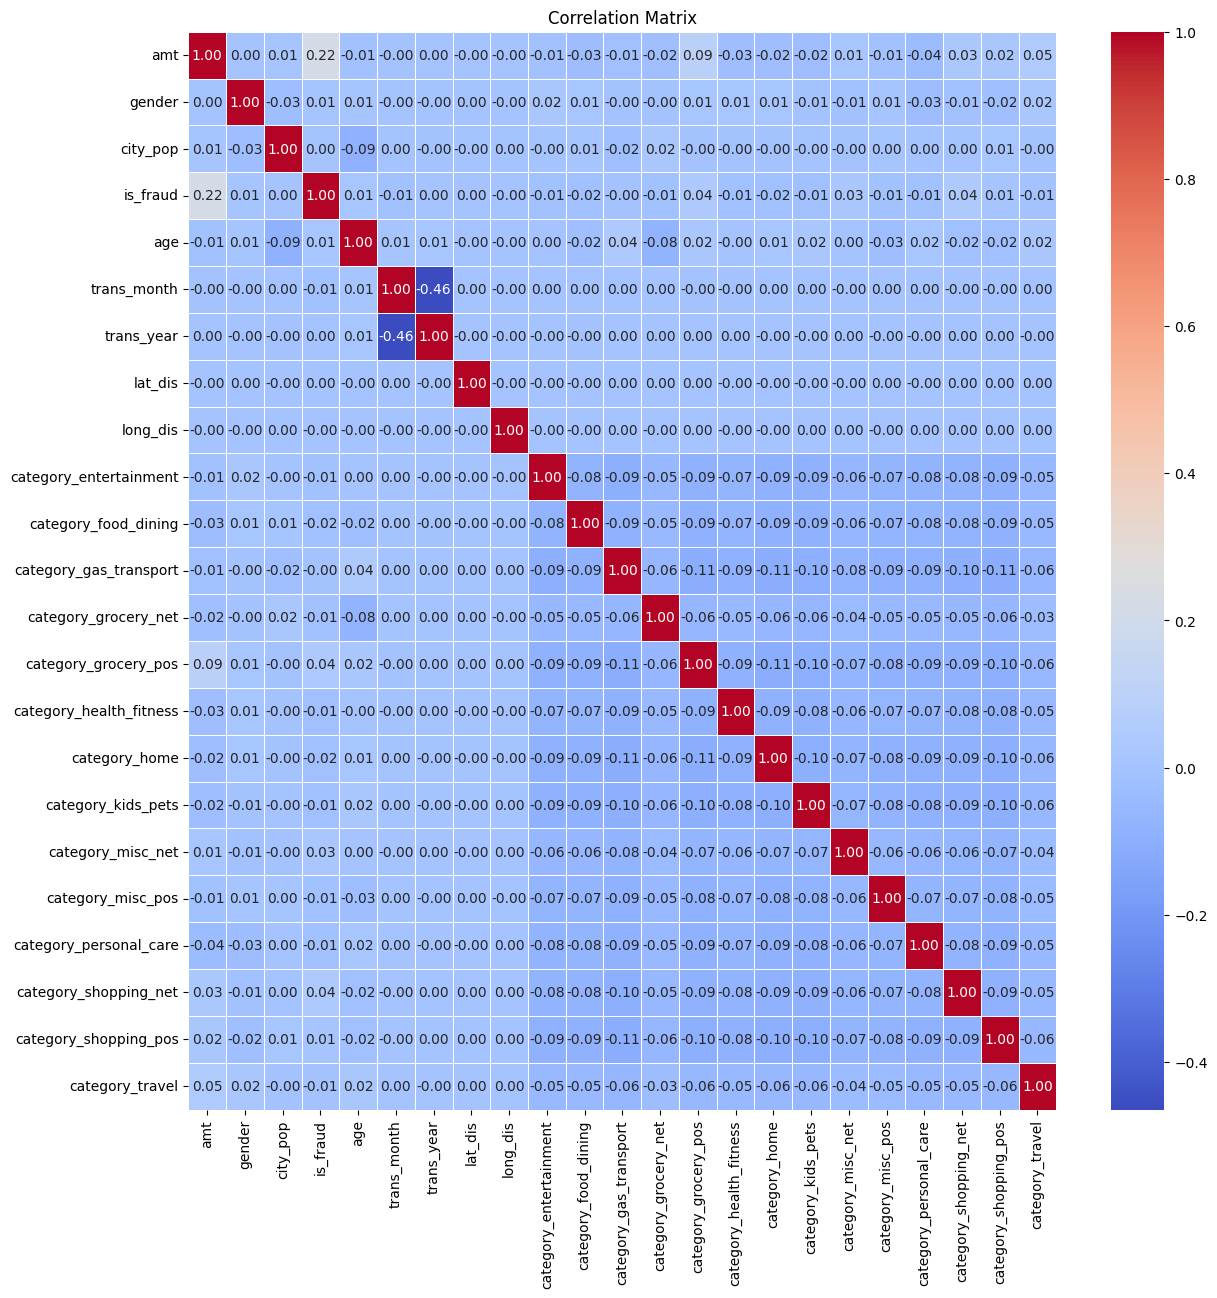

In [11]:
# plotting the correation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Observation : All the data features have low correlation making every fature less and equally important for the prediction,
# except the amount of transaction (amt)

In [12]:
# Counting the number of legit and fraud transaction data in dataset
credit_data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [13]:
# separating the data for analysis
legit = credit_data[credit_data.is_fraud == 0]
fraud = credit_data[credit_data.is_fraud == 1]

In [14]:
# priting their shape
print(legit.shape)
print(fraud.shape)

(1289169, 23)
(7506, 23)


In [15]:
# statistical measures of the legit transaction data
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [16]:
# statistical measures of the frad transaction data
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [17]:
# compare the values for both transactions
credit_data.groupby('is_fraud').mean()

amt    gender      city_pop           age  trans_month  \
is_fraud                                                                  
0          67.667110  0.452261  88775.228137  16794.236578     6.145386   
1         531.320092  0.502398  97276.763256  17821.821876     5.586331   

           trans_year   lat_dis  long_dis  category_entertainment  \
is_fraud                                                            
0         2019.286649  0.500249  0.500341                0.072745   
1         2019.304556  0.502739  0.499577                0.031042   

          category_food_dining  ...  category_grocery_pos  \
is_fraud                        ...                         
0                     0.070829  ...              0.094553   
1                     0.020117  ...              0.232214   

          category_health_fitness  category_home  category_kids_pets  \
is_fraud                                                               
0                        0.066513       0.095346            0.087495   
1                        0.017719       0.026379            0.031841   

          category_misc_net  category_misc_pos  category_personal_care  \
is_fraud                                                                 
0                  0.048382           0.061594                 0.07023   
1                  0.121902           0.033307                 0.02931   

          category_shopping_net  category_shopping_pos  category_travel  
is_fraud                                                                 
0                      0.074335               0.089848         0.031331  
1                      0.228217               0.112310         0.015454  

[2 rows x 22 columns]

In [18]:
# creating a sample legit data set of same size as that of fraud dataset
legit_sample = legit.sample(n=7506)

In [19]:
# joining the legit and fraud data set
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
# checking the new dataset
new_dataset.head()

amt  gender  city_pop  is_fraud    age  trans_month  trans_year  \
597356   116.02       1       804         0  19892            9        2019   
1132709   59.11       1       798         0  34263            4        2020   
762869    78.74       0      1075         0   8360           11        2019   
1090546  134.30       0     35371         0  11531            3        2020   
147485    15.73       0      5908         0  20803            3        2019   

          lat_dis  long_dis  category_entertainment  ...  \
597356   0.096836  0.528735                       0  ...   
1132709  0.206996  0.147576                       0  ...   
762869   0.426434  0.652360                       0  ...   
1090546  0.110324  0.797645                       0  ...   
147485   0.476852  0.768531                       0  ...   

         category_grocery_pos  category_health_fitness  category_home  \
597356                      1                        0              0   
1132709                     0                        1              0   
762869                      0                        0              0   
1090546                     0                        0              1   
147485                      0                        0              1   

         category_kids_pets  category_misc_net  category_misc_pos  \
597356                    0                  0                  0   
1132709                   0                  0                  0   
762869                    0                  0                  0   
1090546                   0                  0                  0   
147485                    0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
597356                        0                      0                      0   
1132709                       0                      0                      0   
762869                        0                      0                      0   
1090546                       0                      0                      0   
147485                        0                      0                      0   

         category_travel  
597356                 0  
1132709                0  
762869                 0  
1090546                0  
147485                 0  

[5 rows x 23 columns]

In [21]:
new_dataset.tail()

amt  gender  city_pop  is_fraud    age  trans_month  trans_year  \
1295399   977.01       0    105638         1  12464            6        2020   
1295491  1210.91       0    105638         1  12464            6        2020   
1295532    10.24       1     71335         1   9518            6        2020   
1295666    21.69       0        23         1  18542            6        2020   
1295733    10.20       1     71335         1   9518            6        2020   

          lat_dis  long_dis  category_entertainment  ...  \
1295399  0.744314  0.431289                       0  ...   
1295491  0.583707  0.547452                       0  ...   
1295532  0.758544  0.458932                       0  ...   
1295666  0.815372  0.743649                       0  ...   
1295733  0.904252  0.970391                       0  ...   

         category_grocery_pos  category_health_fitness  category_home  \
1295399                     0                        0              0   
1295491                     0                        0              0   
1295532                     0                        0              0   
1295666                     0                        0              0   
1295733                     0                        0              0   

         category_kids_pets  category_misc_net  category_misc_pos  \
1295399                   0                  0                  0   
1295491                   0                  0                  0   
1295532                   0                  0                  0   
1295666                   0                  0                  0   
1295733                   0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
1295399                       0                      1                      0   
1295491                       0                      1                      0   
1295532                       0                      0                      0   
1295666                       0                      0                      0   
1295733                       0                      0                      0   

         category_travel  
1295399                0  
1295491                0  
1295532                0  
1295666                0  
1295733                0  

[5 rows x 23 columns]

In [22]:
# checking the count of legit and fraud transaction datasets in new dataset
new_dataset['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [23]:
# separating the target and features
X_train = new_dataset.drop(columns='is_fraud', axis=1)
Y_train = new_dataset['is_fraud']

X_test = test_data.drop(columns='is_fraud', axis=1)
Y_test = test_data['is_fraud']

In [24]:
# printing the features
print(X_train)

             amt  gender  city_pop    age  trans_month  trans_year   lat_dis  \
597356    116.02       1       804  19892            9        2019  0.096836   
1132709    59.11       1       798  34263            4        2020  0.206996   
762869     78.74       0      1075   8360           11        2019  0.426434   
1090546   134.30       0     35371  11531            3        2020  0.110324   
147485     15.73       0      5908  20803            3        2019  0.476852   
...          ...     ...       ...    ...          ...         ...       ...   
1295399   977.01       0    105638  12464            6        2020  0.744314   
1295491  1210.91       0    105638  12464            6        2020  0.583707   
1295532    10.24       1     71335   9518            6        2020  0.758544   
1295666    21.69       0        23  18542            6        2020  0.815372   
1295733    10.20       1     71335   9518            6        2020  0.904252   

         long_dis  category_entertainme

In [25]:
# printing the target
print(Y_train)

597356     0
1132709    0
762869     0
1090546    0
147485     0
          ..
1295399    1
1295491    1
1295532    1
1295666    1
1295733    1
Name: is_fraud, Length: 15012, dtype: int64


In [26]:
print(X_test)

           amt  gender  city_pop    age  trans_month  trans_year   lat_dis  \
0         2.86       1    333497  19087            6        2020  0.020491   
1        29.84       0       302  11113            6        2020  0.870202   
2        41.28       0     34496  18141            6        2020  0.177090   
3        60.05       1     54767  12020            6        2020  0.242698   
4         3.19       1      1126  23727            6        2020  0.706248   
...        ...     ...       ...    ...          ...         ...       ...   
555714   43.77       1       519  20045           12        2020  0.546263   
555715  111.84       1     28739   7675           12        2020  0.621749   
555716   86.88       0      3684  14277           12        2020  0.461740   
555717    7.99       1       129  20105           12        2020  0.154975   
555718   38.13       1    116001  10097           12        2020  0.543597   

        long_dis  category_entertainment  category_food_dining 

Importing the Dependencies for different Machine Learning Supervised - Classification Models:

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# performing feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# performing logistic regression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
accuracy_logistic

0.9541117003377606

In [30]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(X_train,Y_train)
y_pred_dt = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
accuracy_dt

0.9624450486666822

In [31]:
random_forest = RandomForestClassifier(random_state=42,n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
accuracy_rf

0.9738770853614866

In [32]:
print("\nClassification Report for Logistic Regression:\n", classification_report(Y_test, y_pred_logistic))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test, y_pred_dt))
print("\nClassification Report for Random Forest:\n", classification_report(Y_test, y_pred_rf))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.06      0.73      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.09      0.94      0.16      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.57    555719
weighted avg       1.00      0.96      0.98    555719


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.95      0.22      2145

    accuracy                           0.97    